#  Instructions

This dataset is about usual number of hours worked per week by students (15 to 26 years) in the Netherlands.

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 200

In [39]:
students_work = pd.read_csv('../Documents/collecting_data/Usual number of hours worked per week by students.csv', delimiter=",", encoding='utf-8')

In [40]:
#check the columns' name
students_work.columns

Index(['jaar ', 'kwartaal ', 'Secondary education (hours) ',
       'Secondary vocational education (hours) ', 'Higher education (hours) '],
      dtype='object')

In [41]:
#rename the columns: from Dutch to English & make them clear
students_work = students_work.rename(columns={'jaar ': 'year','kwartaal ':'quarter', 'Secondary education (hours) ':'Secondary_education', 'Secondary vocational education (hours) ':'Secondary_vocational_education', 'Higher education (hours) ':'Higher_education'})
students_work.head(5)

,year,quarter,Secondary_education,Secondary_vocational_education,Higher_education
0,2021,Q1,10.6,21.4,17.7
1,2021,Q2,10.2,21.7,18.2
2,2021,Q3,11.4,22.2,18.3
3,2021,Q4,10.0,21.8,16.8
4,2022,Q1,9.1,21.7,17.2


# Question 1:

**How did working hours fluctuate across quarters?**


In [52]:
#1.1. Sum the values in 'Secondary education', 'Secondary vocational education', and 'Higher education'
students_work['total_hours'] = students_work[['Secondary_education', 'Secondary_vocational_education', 'Higher_education']].sum(axis=1)

print(students_work)

    year quarter  Secondary_education  Secondary_vocational_education  \
0   2021      Q1                 10.6                            21.4   
1   2021      Q2                 10.2                            21.7   
2   2021      Q3                 11.4                            22.2   
3   2021      Q4                 10.0                            21.8   
4   2022      Q1                  9.1                            21.7   
5   2022      Q2                 10.0                            21.7   
6   2022      Q3                 11.1                            22.3   
7   2022      Q4                  9.5                            21.1   
8   2023      Q1                  9.3                            22.3   
9   2023      Q2                 10.1                            22.6   
10  2023      Q3                 10.9                            22.5   

    Higher_education  total_hours  
0               17.7         49.7  
1               18.2         50.1  
2              

In [57]:
#1.2. isolate neccessary data
quarterly_sum = students_work.groupby(['year', 'quarter'])['total_hours'].sum()
print(quarterly_sum)

year  quarter
2021  Q1         49.7
      Q2         50.1
      Q3         51.9
      Q4         48.6
2022  Q1         48.0
      Q2         49.7
      Q3         52.1
      Q4         48.1
2023  Q1         49.6
      Q2         51.4
      Q3         52.1
Name: total_hours, dtype: float64


<Axes: title={'center': 'Quarterly Sum'}, xlabel='Quarter'>

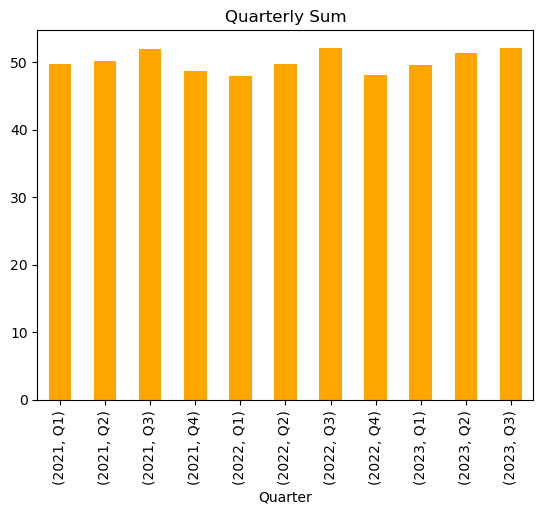

In [56]:
#1.3. visualization
quarterly_sum.plot(kind='bar',title='Quarterly Sum', xlabel='Quarter', color='orange')

1.4. **Analysis**

(How did working hours fluctuate across quarters?)

From the bar plot, in the observed three-year period, working hours exhibit minimal variation between Q1 and Q4. Notably, Q3 (July, August, September) consistently shows higher working hours, while Q1 and Q4 (January, February, March, October, November, December) reflect lower levels.

This pattern aligns with the academic calendar in the Netherlands. The extended summer break provides students with increased flexibility, leading to higher employment hours in Q3. Conversely, when schools commence in January and September, a focus on studies contributes to lower working hours in Q1 and Q4.


# Question 2:

**How did working hours vary among students across these three categories?**


In [60]:
#2.1. isolate neccessary data
secondary_education = students_work.groupby(['year', 'quarter'])['Secondary_education'].sum()

In [63]:
secondary_vocational_education = students_work.groupby(['year', 'quarter'])['Secondary_vocational_education'].sum()

In [64]:
higher_education = students_work.groupby(['year', 'quarter'])['Higher_education'].sum()

<Axes: xlabel='year,quarter'>

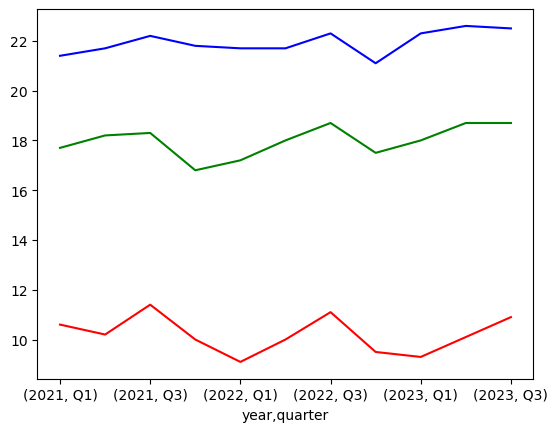

In [69]:
#2.2. visualization
ax = secondary_education.plot(kind='line', x='Year-Quarter', y='hours', color='red')
secondary_vocational_education.plot(ax=ax, kind='line', x='Year-Quarter', y='hours', color='blue')
higher_education.plot(ax=ax, kind='line', x='Year-Quarter', y='hours', color='green')

2.3. **Analysis**

(How did working hours vary among students across these three categories?)

The trend in working hours appears similar, but substantial differences in values are evident. According to the line plot, students in secondary education consistently allocate the least amount of time to work, approximately half of the working hours observed in students pursuing secondary vocational education. Moreover, the working hours of higher education students, although lower than those in secondary vocational education, remain significantly higher than those of students in secondary education.

The significant difference in working hours aligns with the developmental stage of students in secondary education. Students in secondary education in this survey are mostly from 15 to 16 years old, and people usually don't start working from such an young age.

The notable disparity in working hours can also be attributed to the varying demands and expectations of each educational level. Secondary education students likely face a more rigorous academic workload, limiting the time available for employment. In contrast, students in secondary vocational education may have a curriculum that encourages or requires more practical experience, resulting in higher working hours. Higher education students, falling in between, exhibit a moderate engagement in employment, balancing academic commitments with work responsibilities.